# Assignment on Linear Discrimnant Analysis 

Shubh Agarwal 

AIML B2 

22070126108



# IRIS DATASET 

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes or maximizes the seperablity between two classes . In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.



In [12]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
iris = datasets.load_iris()

In [14]:
X = iris.data
y = iris.target 

target_names = iris.target_names

In [15]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# Applying Logistic Regresstion 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [18]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [19]:
model = LogisticRegression()

In [20]:
model

LogisticRegression()

In [21]:
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred_lr = model.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test , y_pred_lr)
conf_matrix = confusion_matrix(y_test,y_pred_lr)
report = classification_report(y_test,y_pred_lr)

In [24]:
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(report)

Accuracy: 1.00

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Applying Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model1 = RandomForestClassifier()

In [27]:
model1.fit(x_train , y_train )

RandomForestClassifier()

In [28]:
y_pred_rf = model1.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test , y_pred_rf)
conf_matrix = confusion_matrix(y_test,y_pred_rf)
report = classification_report(y_test,y_pred_rf)

In [30]:
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(report)

Accuracy: 1.00

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Applying Linear Discriminant Analysis 

In [31]:
lda = LinearDiscriminantAnalysis()

In LDA, the number of components is determined by the number of unique classes in the target variable. Specifically, for a classification problem with k unique classes, LDA will generate at most k - 1 discriminant components. These components are derived to maximize the separation between the classes in the transformed feature space.



In [32]:
lda = lda.fit(X,y).transform(X)

After fitting the LDA model, the transform method is called on the original data X. This method transforms the data into a lower-dimensional space based on the learned discriminant components. The transformed data X_r2 will have fewer dimensions than the original data, with the number of dimensions determined by the number of unique classes in y.

In [33]:
colors = ["navy", "turquoise", "darkorange"]
lw = 2

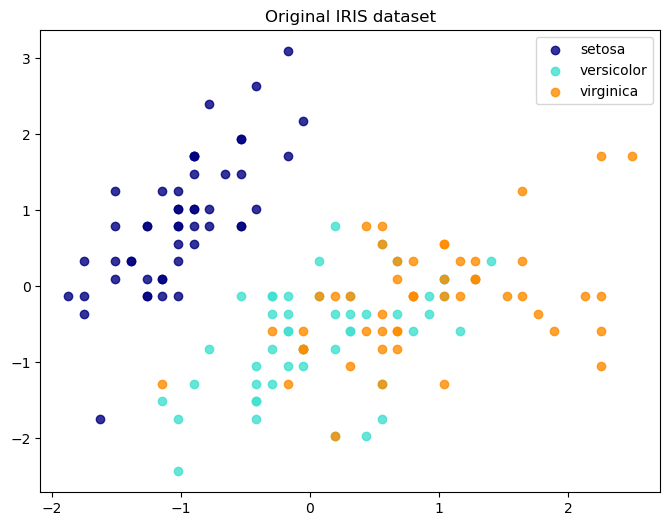

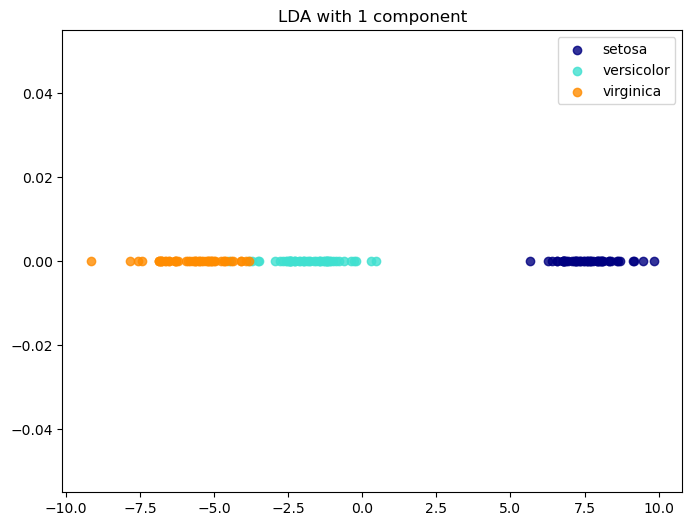

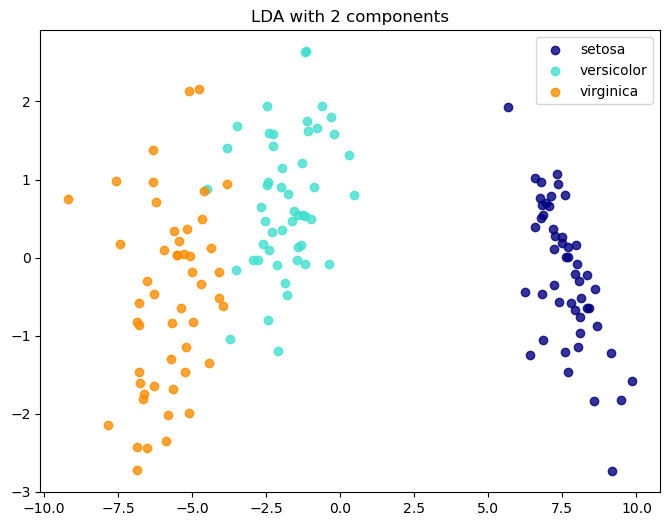

In [34]:
# Original data visualization
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X[y == i, 0], X[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Original IRIS dataset")
plt.show()

# LDA with 1 component
lda1 = LinearDiscriminantAnalysis(n_components=1).fit(X, y)
X_lda1 = lda1.transform(X)

plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_lda1[y == i, 0], np.zeros_like(X_lda1[y == i, 0]), alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA with 1 component")
plt.show()

# LDA with 2 components
lda2 = LinearDiscriminantAnalysis(n_components=2).fit(X, y)
X_lda2 = lda2.transform(X)

plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_lda2[y == i, 0], X_lda2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA with 2 components")
plt.show()


In [35]:
# Calculate the correlation matrices
corr_original = np.corrcoef(X, rowvar=False)
corr_lda = np.corrcoef(X_lda2 , rowvar=False)

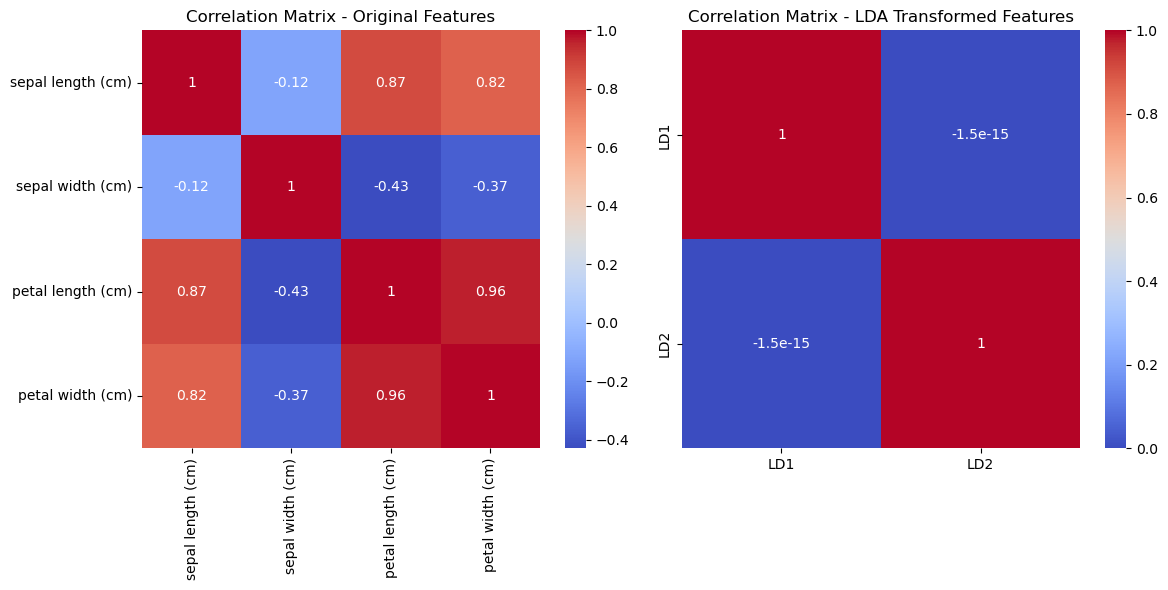

In [36]:
# Plot the heatmaps
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(corr_original, annot=True, cmap='coolwarm', xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Correlation Matrix - Original Features')

plt.subplot(1, 2, 2)
sns.heatmap(corr_lda, annot=True, cmap='coolwarm', xticklabels=['LD1', 'LD2'], yticklabels=['LD1', 'LD2'])
plt.title('Correlation Matrix - LDA Transformed Features')

plt.tight_layout()
plt.show()

Applying LDA reduced the dimensionality of the dataset from 4 to 2 dimensions.
The classification report for the model trained without LDA shows good performance, with high accuracy and F1 scores for all classes.
The classification report for the model trained with LDA shows similar performance to the model without LDA, indicating that LDA was able to reduce the dimensionality without significantly affecting the model's performance.

# MNIST DATASET 

# Synopsis 

The MNIST dataset is a widely used dataset in machine learning and computer vision. It consists of a collection of 70,000 small images of handwritten digits (0-9), each 28x28 pixels in size. This results in a dataset with a high dimensionality of 784 features (28x28). The dataset is split into a training set of 60,000 examples and a test set of 10,000 examples.

The goal of the MNIST dataset is to classify these handwritten digits correctly. It is often used as a benchmark dataset for testing machine learning algorithms, particularly in the field of image recognition. The simplicity and accessibility of the dataset make it a popular choice for beginners to learn and practice machine learning techniques.

In [37]:
# Importing necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
# Load the MNIST dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [39]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


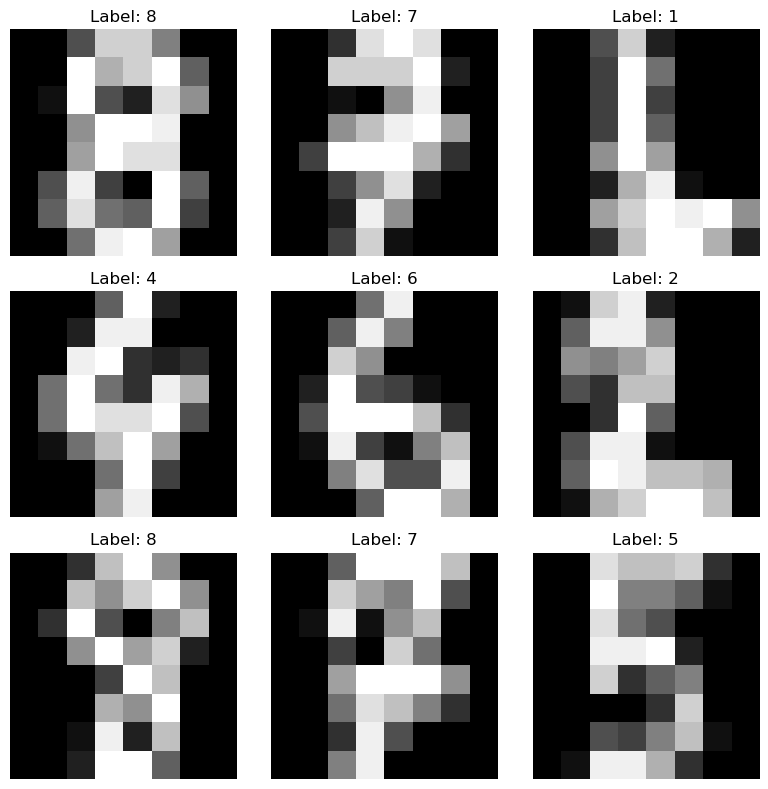

In [40]:
import matplotlib.pyplot as plt

# Plot the first 9 images from the MNIST dataset
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[i * 3 + j].reshape(8, 8), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f"Label: {y_train[i * 3 + j]}")
plt.tight_layout()
plt.show()

The image is a set of black and white labels with digits ranging from 1 to 8.  It is a snippet of the MNIST handwritten digit dataset, which is a common dataset used for training image classification models.

In [41]:
# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Applying Logistic Regression 

In [42]:
# Supervised machine learning model (Logistic Regression) without LDA
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print("Classification Report without LDA:")
print(classification_report(y_test, y_pred))

Classification Report without LDA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.98      0.93        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Applying LDA

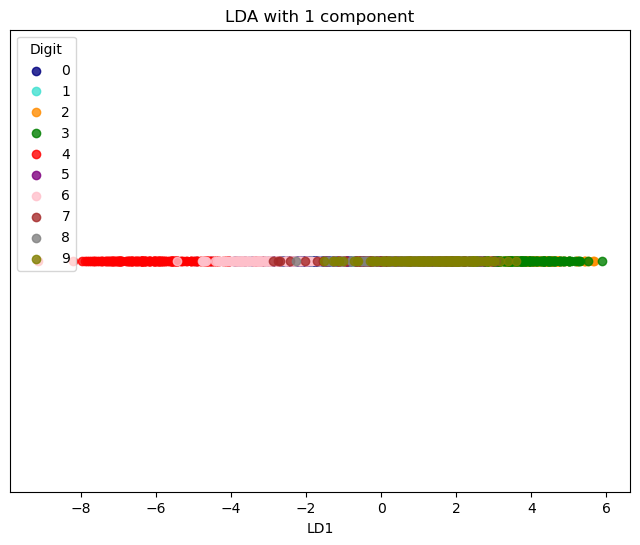

In [45]:
# Apply LDA with 1 component
lda1 = LDA(n_components=1).fit(X, y)
X_lda1 = lda1.transform(X)

# Plot LDA with 1 component
plt.figure(figsize=(8, 6))
for color, i in zip(['navy', 'turquoise', 'darkorange', 'green', 'red', 'purple', 'pink', 'brown', 'gray', 'olive'], range(10)):
    plt.scatter(
        X_lda1[y == i, 0], np.zeros_like(X_lda1[y == i, 0]), alpha=0.8, color=color, label=str(i)
    )
plt.legend(loc="best", shadow=False, scatterpoints=1, title='Digit')
plt.title("LDA with 1 component")
plt.xlabel('LD1')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

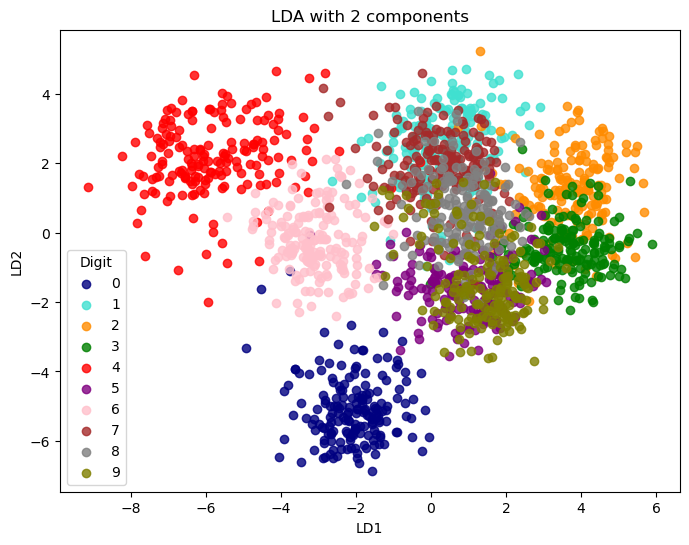

In [46]:
# Apply LDA with 2 components
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot LDA with 2 components
plt.figure(figsize=(8, 6))
for color, i in zip(['navy', 'turquoise', 'darkorange', 'green', 'red', 'purple', 'pink', 'brown', 'gray', 'olive'], range(10)):
    plt.scatter(
        X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.8, color=color, label=str(i)
    )
plt.legend(loc="best", shadow=False, scatterpoints=1, title='Digit')
plt.title("LDA with 2 components")
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

It can be seen that the clustering is not clear with LDA which gives us some inference that it may not give good results 

In [7]:
# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)


In [8]:
# Supervised machine learning model (Logistic Regression) with LDA
lr_lda = LogisticRegression(max_iter=10000)
lr_lda.fit(X_train_lda, y_train)
y_pred_lda = lr_lda.predict(X_test_lda)
print("\nClassification Report with LDA:")
print(classification_report(y_test, y_pred_lda))


Classification Report with LDA:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.73      0.72      0.73        50
           2       0.85      0.83      0.84        47
           3       0.76      0.87      0.81        54
           4       0.96      0.87      0.91        60
           5       0.59      0.53      0.56        66
           6       0.76      0.89      0.82        53
           7       0.56      0.45      0.50        55
           8       0.50      0.63      0.56        43
           9       0.49      0.47      0.48        59

    accuracy                           0.71       540
   macro avg       0.72      0.72      0.72       540
weighted avg       0.72      0.71      0.71       540



So the accuracy shows that the performance after applying LDA decreases so it is preferable to use this dataset without applying LDA 

# Correlation heat map after LDA

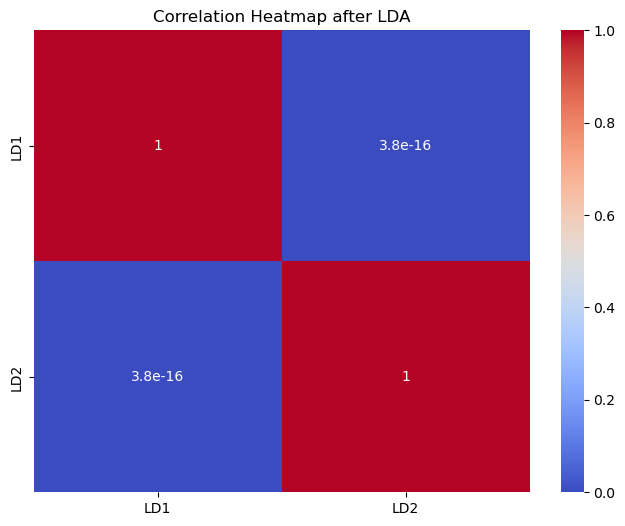

In [47]:
# Convert LDA components to a DataFrame
df_lda = pd.DataFrame(data=X_train_lda, columns=['LD1', 'LD2'])

# Calculate the correlation matrix
corr = df_lda.corr()

# Plot the correlation heat map
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap after LDA')
plt.show()